In [39]:
# Homework 4: Nonlinear stress versus strain response (Newton's Method)

In [4]:
import sympy as sp
# Define symbols
E, sigma_y, H, epsilon, delta, A, u, L, P = sp.symbols('E sigma_y H epsilon delta,A, u, L, P', positive=True)
display(E, sigma_y, H, epsilon, delta, A, u, L)

E

sigma_y

H

epsilon

delta

A

u

L

In [5]:
eps_y = sigma_y/E
s = (1/2)*(1 + sp.tanh((epsilon - eps_y)/delta))
# Smooth blend: elastic -> (yield + linear hardening)
sigma = (1 - s)*(E*epsilon) + s*(sigma_y + H*(epsilon - eps_y))
display(s,sigma)

0.5*tanh((epsilon - sigma_y/E)/delta) + 0.5

E*epsilon*(0.5 - 0.5*tanh((epsilon - sigma_y/E)/delta)) + (H*(epsilon - sigma_y/E) + sigma_y)*(0.5*tanh((epsilon - sigma_y/E)/delta) + 0.5)

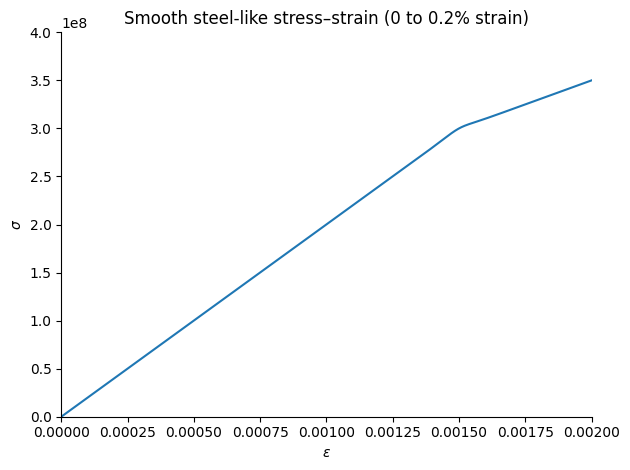

In [6]:
# Plot 0 to 0.2% strain
E_val = 200e9
sigma_y_val = 300e6
H_val = 1e11
delta_val = 5e-5

p = sp.plot(
    sigma,
    (epsilon, 0, 2e-3),
    params={E: E_val, sigma_y: sigma_y_val, H: H_val, delta: delta_val},
    show=False
)

p.xlim = (0, 2e-3)
p.ylim = (0, 0.4e9)   # up to 0.4 GPa
p.xlabel = r'$\epsilon$'
p.ylabel = r'$\sigma$'
p.title = 'Smooth steel-like stress–strain (0 to 0.2% strain)'
p.show()

In [7]:
# Define the nonlinear function f(u)
f = A*sigma-P
display(f)

A*(E*epsilon*(0.5 - 0.5*tanh((epsilon - sigma_y/E)/delta)) + (H*(epsilon - sigma_y/E) + sigma_y)*(0.5*tanh((epsilon - sigma_y/E)/delta) + 0.5)) - P

In [8]:
f = f.subs(epsilon,u/L)
f

A*(E*u*(0.5 - 0.5*tanh((u/L - sigma_y/E)/delta))/L + (H*(u/L - sigma_y/E) + sigma_y)*(0.5*tanh((u/L - sigma_y/E)/delta) + 0.5)) - P

In [9]:
fp = sp.diff(f,u)

In [10]:
display(f,fp)

A*(E*u*(0.5 - 0.5*tanh((u/L - sigma_y/E)/delta))/L + (H*(u/L - sigma_y/E) + sigma_y)*(0.5*tanh((u/L - sigma_y/E)/delta) + 0.5)) - P

A*(E*(0.5 - 0.5*tanh((u/L - sigma_y/E)/delta))/L - 0.5*E*u*(1 - tanh((u/L - sigma_y/E)/delta)**2)/(L**2*delta) + H*(0.5*tanh((u/L - sigma_y/E)/delta) + 0.5)/L + 0.5*(1 - tanh((u/L - sigma_y/E)/delta)**2)*(H*(u/L - sigma_y/E) + sigma_y)/(L*delta))

In [11]:
# Input user defined paramters
E_num = 200e9
sigy_num = 300e6
H_num = 1e11
delta_num = 5e-5
L_num = 1.0
A_num = 1e-4
P_num = 35000
#
# create a Sympy substitution dictionary
subs_dict = {
    E: E_num,
    sigma_y: sigy_num,
    H: H_num,
    delta: delta_num,
    L: L_num,
    A: A_num,
    P: P_num
}

fi = f.subs(subs_dict)
fpi = fp.subs(subs_dict)


# Newton's method iterations
# initial guess
ui = P_num*L_num/(E_num*A_num)
tol = 1e-8
niter = 30
residual = []
for i in range(niter):
    fi_val = fi.subs(u,ui)
    fpi_val = fpi.subs(u,ui)
    # check for convergence
    ri = abs(float(fi_val))
    residual.append(ri)
    print(ri)
    if ri < tol:
        break
    dui = -fi_val/fpi_val
    ui = ui + dui

print(residual)
print(ui)
    
    



2499.886505328246
0.9082872059589135
6.548361852765083e-11
[2499.886505328246, 0.9082872059589135, 6.548361852765083e-11]
0.00199999999896943


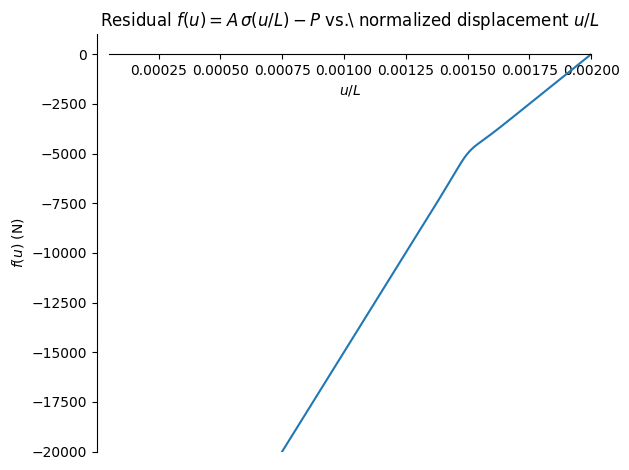

In [20]:
# Plot f(u) versus u/L

# --- define eta = u/L as the plot variable ---
eta = sp.symbols('eta', real=True)

# Build f as a function of eta (since epsilon = u/L = eta)
f_eta = sp.simplify(A * sigma.subs(epsilon, eta) - P)

# --- parameter values ---
E_val = 200e9
sigma_y_val = 300e6
H_val = 1e11
delta_val = 5e-5
A_val = 1e-4
P_val = 35000   # <-- choose ~30–35 kN to stay in 0–0.2% strain

# --- plot f(eta) vs eta = u/L ---
p = sp.plot(
    f_eta,
    (eta, 0, 2e-3),
    params={E: E_val, sigma_y: sigma_y_val, H: H_val, delta: delta_val, A: A_val, P: P_val},
    show=False
)

p.xlim = (.05e-3, 2e-3)
# set y-limits after you see the scale; here is a reasonable starting point:
p.ylim = (-2e4, 1e3)  # Newtons (adjust if needed)

p.xlabel = r'$u/L$'
p.ylabel = r'$f(u)$ (N)'
p.title = r'Residual $f(u)=A\,\sigma(u/L)-P$ vs.\ normalized displacement $u/L$'
p.show()